In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_path="/content/Test"
train_path= "/content/Training"
val_path= "/content/val"

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
x_train=[]

for folder in os.listdir("/content/Training"):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [ ]:

x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [ ]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x.shape,test_x.shape,val_x.shape

((181, 224, 224, 3), (88, 224, 224, 3), (54, 224, 224, 3))

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 181 images belonging to 3 classes.
Found 88 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'.ipynb_checkpoints': 0, 'mri': 1, 'xray': 2}

In [ ]:
train_y=training_set.classes

In [ ]:
test_y=test_set.classes

In [ ]:
val_y=val_set.classes

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((181,), (88,), (54,))

In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import tensorflow as tf 
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = model.fit(train_x, 
          train_y,  
          validation_data=(val_x,val_y),
          epochs=10,
          callbacks=[early_stop],
          batch_size=32,shuffle=True
          )  # Pass callback to training 

Epoch 1/10
6/6 [==============================] - 150s 26s/step - loss: 0.1568 - accuracy: 0.9669 - val_loss: 0.0585 - val_accuracy: 0.9815
Epoch 2/10
6/6 [==============================] - 152s 26s/step - loss: 0.0135 - accuracy: 0.9945 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 152s 26s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 149s 26s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 150s 26s/step - loss: 9.5104e-04 - accuracy: 1.0000 - val_loss: 5.4412e-04 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 153s 27s/step - loss: 3.0905e-04 - accuracy: 1.0000 - val_loss: 3.9979e-04 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 151s 26s/step - loss: 1.5386e-04 - accuracy: 1.0000 - val_loss: 3.9260e-04 - val_accuracy: 1.0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
10/10 [==============================] - 181s 18s/step - loss: 0.6708 - accuracy: 0.8000 - val_loss: 0.0426 - val_accuracy: 0.9815
Epoch 2/10
10/10 [==============================] - 186s 19s/step - loss: 0.0494 - accuracy: 0.9738 - val_loss: 0.1821 - val_accuracy: 0.9259
Epoch 3/10
10/10 [==============================] - 182s 18s/step - loss: 0.0227 - accuracy: 0.9902 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 184s 19s/step - loss: 5.3651e-04 - accuracy: 1.0000 - val_loss: 2.6026e-04 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 178s 18s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.7012e-04 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 179s 18s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.3965e-04 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 180s 18s/step - loss: 1.5341e-04 - accuracy: 1.0000 - val_loss: 1.0016e-04 - val

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


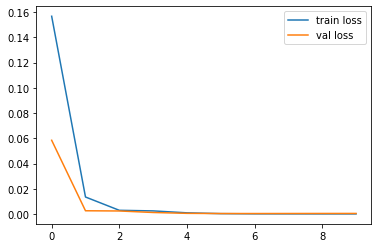

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

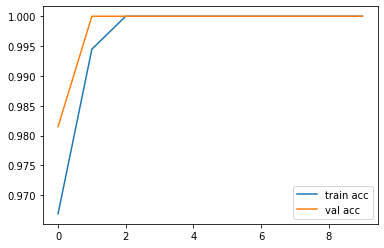

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=32)

3/3 [==============================] - 55s 18s/step - loss: 7.2951e-05 - accuracy: 1.0000


[7.295115938177332e-05, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
accuracy_score(y_pred,test_y)

NameError: ignored

In [ ]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        71

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [ ]:
confusion_matrix(y_pred,test_y)

array([[17,  0],
       [ 0, 71]])

In [1]:
path="ADD YOUR OWN FINAL TESTING FILE PATH HERE"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][1]>0.5:
        print("mri")
    elif pred[0][2]>0.5:
        print("xray")
    else:
        print("Unknown")

NameError: ignored

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:10/10}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32


In [ ]:

import tensorflow as tf
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

In [ ]:
model.save("vgg-XRAY-final.h5")

In [ ]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.models import load_model
new_model=keras.models.load_model("vgg-XRAY-final.h5")
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model
model.save("/content/gdrive/MyDrive/vgg-XRAY-final.h5")
